Epoch 1/50
12/12 [==============================] - 1s 13ms/step - loss: 0.5798 - accuracy: 0.7280 - val_loss: 0.3615 - val_accuracy: 0.9451
Epoch 2/50
12/12 [==============================] - 0s 4ms/step - loss: 0.2901 - accuracy: 0.9368 - val_loss: 0.1907 - val_accuracy: 0.9560
Epoch 3/50
12/12 [==============================] - 0s 3ms/step - loss: 0.1657 - accuracy: 0.9588 - val_loss: 0.1261 - val_accuracy: 0.9560
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 0.1162 - accuracy: 0.9643 - val_loss: 0.1030 - val_accuracy: 0.9670
Epoch 5/50
12/12 [==============================] - 0s 4ms/step - loss: 0.0893 - accuracy: 0.9780 - val_loss: 0.0924 - val_accuracy: 0.9780
Epoch 6/50
12/12 [==============================] - 0s 3ms/step - loss: 0.0814 - accuracy: 0.9753 - val_loss: 0.0880 - val_accuracy: 0.9780
Epoch 7/50
12/12 [==============================] - 0s 4ms/step - loss: 0.0689 - accuracy: 0.9725 - val_loss: 0.0857 - val_accuracy: 0.9780
Epoch 8/50
12/12 [=

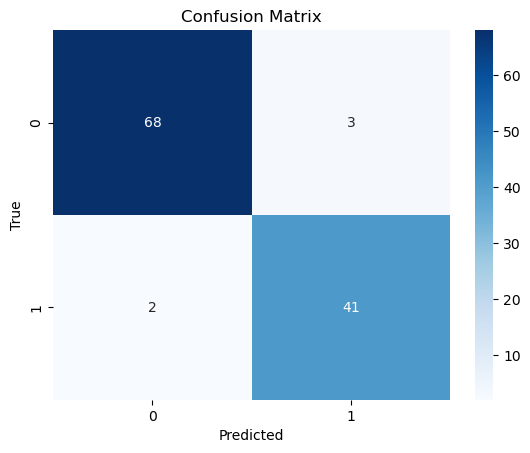

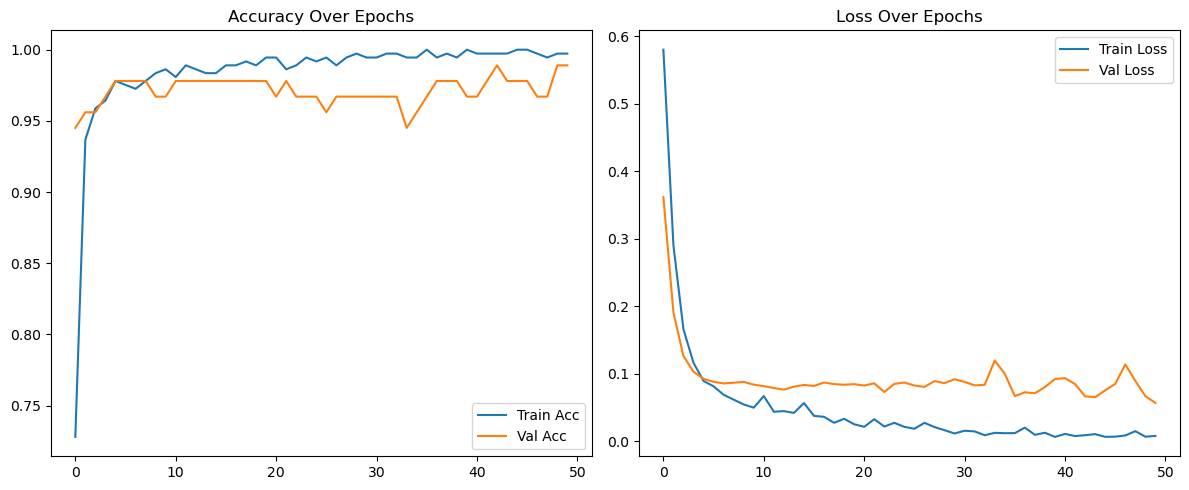

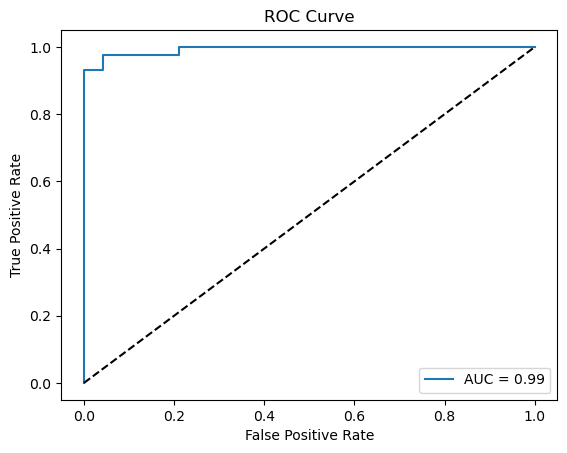

Epoch 1/20
4/4 - 0s - loss: 1.5453 - accuracy: 0.1883 - val_loss: 1.4787 - val_accuracy: 0.1739 - 454ms/epoch - 114ms/step
Epoch 2/20
4/4 - 0s - loss: 1.4985 - accuracy: 0.1956 - val_loss: 1.4337 - val_accuracy: 0.1739 - 20ms/epoch - 5ms/step
Epoch 3/20
4/4 - 0s - loss: 1.4528 - accuracy: 0.1980 - val_loss: 1.3893 - val_accuracy: 0.1739 - 25ms/epoch - 6ms/step
Epoch 4/20
4/4 - 0s - loss: 1.4084 - accuracy: 0.1980 - val_loss: 1.3458 - val_accuracy: 0.1739 - 32ms/epoch - 8ms/step
Epoch 5/20
4/4 - 0s - loss: 1.3637 - accuracy: 0.2005 - val_loss: 1.3031 - val_accuracy: 0.1957 - 24ms/epoch - 6ms/step
Epoch 6/20
4/4 - 0s - loss: 1.3208 - accuracy: 0.2127 - val_loss: 1.2613 - val_accuracy: 0.1957 - 27ms/epoch - 7ms/step
Epoch 7/20
4/4 - 0s - loss: 1.2790 - accuracy: 0.2176 - val_loss: 1.2209 - val_accuracy: 0.1957 - 16ms/epoch - 4ms/step
Epoch 8/20
4/4 - 0s - loss: 1.2366 - accuracy: 0.2249 - val_loss: 1.1816 - val_accuracy: 0.2174 - 22ms/epoch - 5ms/step
Epoch 9/20
4/4 - 0s - loss: 1.1969 - 

In [14]:
#Loading in my libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#Loading in my data that I downloaded
df = pd.read_csv("C:/Users/luket/Downloads/cancer_data.csv")
#Getting rid of the unnamed column. Not sure what this was for.
df = df.drop(columns=['Unnamed: 32'], errors='ignore') 
#Getting rid of the id column. This is just because it doesn't mean anything. 
df = df.drop(columns=['id'], errors='ignore')  
#Getting rid of any na values so it doesn't mess up our analysis 
df = df.dropna() 
#Encoding the diagnosis. Malignant is 1 and benign is 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
#getting my x and y. My y is the diagnosis and my x is every predictor but my diagnosis 
y = df['diagnosis']
X = df.drop(columns=['diagnosis'])
#This is standardizing the features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#Splitting into my training and test. Going to do 20% as my test 80% as my train
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
#Going to make a deep neural network with relu activation 
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    #final layer is signmoid since its binary 
    Dense(1, activation='sigmoid')  
])

#Compiling my model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#training my model 
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

#evaluating my model 
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# having a classification report 
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))
# Predictions and metrics
y_pred = model.predict(X_test).flatten()
y_pred_labels = (y_pred >= 0.5).astype(int)  # <-- this line defines y_pred_labels
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss Over Epochs")
plt.tight_layout()
plt.show()
#plotting my roc curve 
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

#Compare to linear regression so we have a baseline 
linear_model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])
linear_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
linear_model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.1, verbose=2)
loss, accuracy = linear_model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy:.4f}")

In [16]:
print(df.head())

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          